Напишите запрос, который выведет сезон (season), а также общее количество забитых мячей домашними (total_home_goals) и гостевыми (total_away_goals) командами.

Отсортируйте по столбцу с сезоном в порядке возрастания.

In [ ]:
SELECT 
    season,
    SUM(home_team_goals) AS total_home_goals,
    SUM(away_team_goals) AS total_away_goals
FROM 
    sql.matches
GROUP BY
    season
ORDER BY 
    season

Существует несколько способов соединения таблиц. Мы познакомимся со всеми основными операторами, которые используются для этих нужд, но начнём с простого метода объединения таблиц — без операторов.

In [ ]:
SELECT * /*выбор всех полей*/
FROM
    sql.teams, /*таблица с командами*/
    sql.matches /*таблица с матчами*/

Каждая запись, которая есть в таблице teams, будет соединена с каждой записью в таблице matches.

Это действие также называют декартовым произведением таблиц.

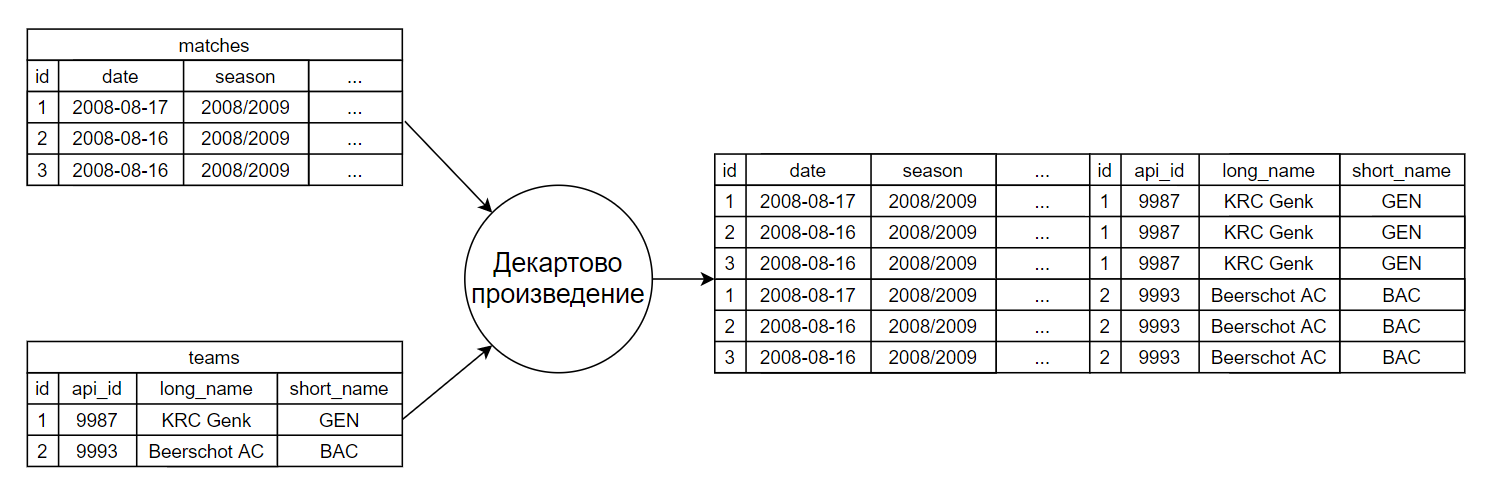

Напишите запрос, который выведет количество строк соединённой таблицы.

In [ ]:
SELECT COUNT(*)
FROM
    sql.teams,
    sql.matches

В данном случае соединение таблиц не даёт практической пользы: мы получили очень много записей, которые никак не можем интерпретировать, потому что команды не соответствуют матчам.

Давайте исправим это. В таблице teams есть столбец api_id, а таблица matches содержит столбцы home_team_api_id и away_team_api_id — это ключи таблиц, по которым они соединяются.

In [ ]:
SELECT *
FROM
    sql.teams,
    sql.matches
WHERE home_team_api_id = api_id

Ключи нужны для того, чтобы иметь возможность не перепутать между собой различные записи.

Как правило, названия ключей имеют «хвост», который позволяет их идентифицировать: например, _id, _rk, _cd, _pk (от primary_key), _fk (от foreign_key) и другие.

Вы могли заметить, что в последних двух запросах получилось очень много столбцов. Как и при работе с одиночной таблицей, мы можем выбирать, какие столбцы соединённой таблицы выводить.

С помощью известного нам запроса получим названия команд, игравших домашние матчи, и счёт матчей.

In [ ]:
SELECT 
    long_name, 
    home_team_goals,
    away_team_goals
FROM
    sql.teams,
    sql.matches
WHERE home_team_api_id = api_id

JOIN — это оператор SQL, который позволяет соединять таблицы по условию.

In [ ]:
SELECT 
    long_name,
    home_team_goals,
    away_team_goals
FROM    
    sql.teams
JOIN sql.matches on home_team_api_id = api_id

Можно указать, откуда мы хотим запросить данные, записав название таблицы перед столбцом через точку.

In [ ]:
SELECT
    teams.id
FROM 
    sql.teams
JOIN sql.matches ON home_team_api_id = api_id

Напишите запрос, который выведет два столбца: id матча (match_id) и id домашней команды (team_id). Отсортируйте по id матча в порядке возрастания значений.

In [ ]:
SELECT
    matches.id as match_id,
    teams.id as team_id
FROM 
    sql.teams
    JOIN sql.matches on home_team_api_id = api_id

Давайте с помощью запроса SQL получим таблицу, содержащую:

- название домашней команды;
- количество забитых домашней командой голов;
- количество забитых гостевой командой голов;
- название гостевой команды.

In [ ]:
SELECT
    h.long_name "домашняя команда",
    m.home_team_goals "голы домашней команды",
    m.away_team_goals "голы гостевой команды",
    a.long_name "гостевая команда" 
FROM
    sql.matches m
    JOIN sql.teams h ON m.home_team_api_id = h.api_id
    JOIN sql.teams a ON m.away_team_api_id = a.api_id

Принципиальное отличие фильтрации данных по соединённым таблицам от аналогичного действия по одиночным таблицам заключается в том, что, фильтруя записи одной таблицы, мы также будем фильтровать и записи другой таблицы, поскольку соединённые на уровне запроса таблицы по сути являются единой таблицей.

In [ ]:
SELECT 
	m.id id_1,
	m.season,
	t.id id_2,
	t.long_name
FROM
	sql.teams t
JOIN sql.matches m ON m.away_team_api_id = t.api_id

Напишите запрос, который выведет полное название домашней команды (long_name), количество голов домашней команды (home_goal) и количество голов гостевой команды (away_goal) в матчах, где домашней командой были команды с коротким названием 'GEN'. Отсортируйте запрос по id матча в порядке возрастания.

In [ ]:
SELECT
    t.long_name long_name,
    m.home_team_goals home_goal,
    m.away_team_goals away_goal
FROM    
    sql.matches m
JOIN sql.teams t ON t.api_id = m.home_team_api_id
WHERE
    t.short_name = 'GEN'
ORDER BY m.id

Также мы можем отфильтровать записи сразу по двум таблицам.

In [ ]:
SELECT *
FROM    
    sql.matches m
    JOIN sql.teams t on t.api_id = m.home_team_api_id
WHERE
    t.short_name = 'GEN'
    AND m.season = '2008/2009'

Напишите запрос, чтобы вывести id матчей, короткое название домашней команды (home_short), короткое название гостевой команды (away_short) для матчей сезона 2011/2012, в которых участвовала команда с названием Liverpool. Отсортируйте по id матча в порядке возрастания.

In [ ]:
SELECT
    m.id,
    t.short_name home_short,
    t1.short_name away_short
FROM
    sql.matches m
JOIN sql.teams t ON m.home_team_api_id = t.api_id
JOIN sql.teams t1 ON m.away_team_api_id = t1.api_id
WHERE
    m.season = '2011/2012'
    and (t.long_name = 'Liverpool' or t1.long_name = 'Liverpool')
ORDER BY m.id

К соединённым таблицам также применимы любые агрегатные функции — самые важные функции для анализа данных.

In [ ]:
SELECT
    t.long_name, /*столбец long_name таблицы t*/
    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals /*функция суммирования; столбец home_team_goals таблицы m; функция суммирования; столбец away_team_goals таблицы m; новое название столбца*/
FROM
    sql.matches m /*таблица matches с алиасом m*/
    JOIN sql.teams t ON m.away_team_api_id = t.api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: away_team_api_id таблицы m равен api_id таблицы t*/
GROUP BY t.id /*группировка по столбцу id таблицы t*/

В прошлых юнитах для соединения таблиц мы использовали один оператор — JOIN. В действительности же он не один: существует несколько различных видов соединений (join’ов)

Для INNER JOIN работает следующее правило: присоединяются только те строки таблиц, которые удовлетворяют условию соединения. Если в любой из соединяемых таблиц находятся такие строки, которые не удовлетворяют заявленному условию, — они отбрасываются.

In [ ]:
SELECT 
COUNT(DISTINCT api_id)
FROM sql.teams

Теперь добавим к teams таблицу с матчами.

In [ ]:
SELECT 
COUNT(DISTINCT t.id) 
FROM 
sql.teams t
JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id

Для LEFT JOIN работает следующее правило: из левой (относительно оператора) таблицы сохраняются все строки, а из правой добавляются только те, которые соответствуют условию соединения. Если в правой таблице не находится соответствия, то значения строк второй таблицы будут иметь значение NULL.

Используя LEFT JOIN, выведите список уникальных названий команд, содержащихся в таблице matches. Отсортируйте список в алфавитном порядке.

Обратите внимание! При применении функций SUM, MIN, MAX, AVG к полям со значением NULL в результате получится NULL, а не 0. А при использовании функции COUNT, наоборот, получится 0.

In [ ]:
SELECT DISTINCT t.long_name
FROM sql.teams t
LEFT JOIN sql.matches m 
ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
WHERE m.id IS NOT NULL
ORDER BY t.long_name

Оператор FULL OUTER JOIN объединяет в себе LEFT и RIGHT JOIN и позволяет сохранить кортежи обеих таблиц. Даже если не будет соответствий, мы сохраним все записи из обеих таблиц.

In [ ]:
SELECT 
…
FROM
	table1
FULL OUTER JOIN table2 ON условие

CROSS JOIN соединяет таблицы так, что каждая запись в первой таблице присоединяется к каждой записи во второй таблице, иначе говоря, даёт декартово произведение.

In [ ]:
SELECT *
FROM
    sql.teams,
    sql.matches

In [ ]:
SELECT *
FROM
    sql.teams
    CROSS JOIN sql.matches

In [ ]:
SELECT *
FROM
    sql.teams
    JOIN sql.matches ON TRUE

Напишите запрос, который выведет список уникальных полных названий команд (long_name), игравших в гостях в матчах сезона 2012/2013. Отсортируйте список в алфавитном порядке.

In [ ]:
SELECT
    DISTINCT
    t.long_name
FROM
    sql.matches m
    JOIN sql.teams t ON m.away_team_api_id = t.api_id
WHERE m.season = '2012/2013'
ORDER BY t.long_name

Напишите запрос, который выведет полное название команды (long_name) и общее количество матчей (matches_cnt), сыгранных командой Inter в домашних матчах.

In [ ]:
SELECT
    t.long_name,
    COUNT(m.home_team_goals) AS matches_cnt
FROM
    sql.matches m
    JOIN sql.teams t ON m.home_team_api_id = t.api_id
WHERE t.long_name = 'Inter'
GROUP BY t.long_name

Напишите запрос, который выведет топ-10 команд (long_name) по суммарному количеству забитых голов в гостевых матчах. Во втором столбце запроса выведите суммарное количество голов в гостевых матчах (total_goals).

In [ ]:
select
    t.long_name,
    sum(m.away_team_goals) total_goals

from sql.matches m
join sql.teams t on m.away_team_api_id = t.api_id
group by t.long_name
order by total_goals desc
limit 10

Выведите количество матчей между командами Real Madrid CF и FC Barcelona. В поле ниже введите запрос, с помощью которого вы решили задание.

In [ ]:
SELECT COUNT(*)
FROM sql.matches m
JOIN sql.teams t1 ON m.home_team_api_id = t1.api_id
JOIN sql.teams t2 ON m.away_team_api_id = t2.api_id
WHERE (t1.long_name = 'Real Madrid CF' AND t2.long_name = 'FC Barcelona')
   OR (t1.long_name = 'FC Barcelona' AND t2.long_name = 'Real Madrid CF')

Напишите запрос, который выведет название команды (long_name), сезон (season) и суммарное количество забитых голов в домашних матчах (total_goals). Оставьте только те строки, в которых суммарное количество голов менее десяти. Отсортируйте запрос по названию команды, а затем — по сезону

In [ ]:
SELECT 
    t.long_name AS team_name,
    m.season,
    SUM(m.home_team_goals) AS total_goals
FROM 
    sql.matches m
JOIN 
    sql.teams t ON m.home_team_api_id = t.api_id
GROUP BY 
    t.long_name, m.season
HAVING 
    SUM(m.home_team_goals) < 10
ORDER BY 
    team_name, m.season